In [ ]:
!nvidia-smi

Thu May 23 17:23:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import plot_loss_curves, unzip_data, walk_through_dir

--2024-05-23 17:23:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-23 17:23:04 (65.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2024-05-23 17:23:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.207, 172.253.119.207, 108.177.121.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   223MB/s    in 0.7s    

2024-05-23 17:23:16 (223 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 )
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=BATCH_SIZE,
                                                                 )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
input = tf.keras.layers.Input(shape=(224,224,3),name="Input_Layer")
x = base_model (input)
x = tf.keras.layers.GlobalAveragePooling2D(name="Global_average_pooling_2d") (x)
outputs = tf.keras.layers.Dense(10,activation="softmax") (x)

model_0 = tf.keras.Model(input,outputs)
model_0.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_0 = model_0.fit(train_data,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=int(0.25 * len(test_data)),epochs=5)

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/5
24/24 [==============================] - 19s 358ms/step - loss: 1.7871 - accuracy: 0.4613 - val_loss: 1.2276 - val_accuracy: 0.7336
Epoch 2/5
24/24 [==============================] - 5s 175ms/step - loss: 1.0546 - accuracy: 0.7760 - val_loss: 0.8378 - val_accuracy: 0.8141
Epoch 3/5
24/24 [==============================] - 4s 138ms/step - loss: 0.7612 - accuracy: 0.8480 - val_loss: 0.7101 - val_accuracy: 0.8355
Epoch 4/5
24/24 [==============================] - 7s 294ms/step - loss: 0.6254 - accuracy: 0.8693 - val_loss: 0.6014 - val_accuracy: 0.8520
Epoch 5/5
24/24 [==============================] - 4s 135ms/step - loss: 0.5353 - accuracy: 0.8733 - val_loss: 0.5732 - val_accuracy: 0.8438


In [ ]:
base_model_copy = tf.keras.applications.ResNet101(include_top=False)
base_model_copy.trainable = False
input = tf.keras.layers.Input(shape=(224,224,3),name="Input_Layer")
x = base_model_copy (input)
x = tf.keras.layers.GlobalAveragePooling2D(name="Global_average_pooling_2d") (x)
outputs = tf.keras.layers.Dense(10,activation="softmax") (x)

model_0_copy = tf.keras.Model(input,outputs)
model_0_copy.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_0_coy = model_0_copy.fit(train_data,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=int(0.25 * len(test_data)),epochs=5)

171446536/171446536 [==============================] - 1s 0us/step
Epoch 1/5
24/24 [==============================] - 21s 511ms/step - loss: 2.1564 - accuracy: 0.3013 - val_loss: 1.4083 - val_accuracy: 0.5280
Epoch 2/5
24/24 [==============================] - 9s 373ms/step - loss: 1.0829 - accuracy: 0.6667 - val_loss: 1.0385 - val_accuracy: 0.6678
Epoch 3/5
24/24 [==============================] - 8s 296ms/step - loss: 0.7754 - accuracy: 0.7760 - val_loss: 0.9127 - val_accuracy: 0.7105
Epoch 4/5
24/24 [==============================] - 8s 311ms/step - loss: 0.6029 - accuracy: 0.8387 - val_loss: 0.8672 - val_accuracy: 0.7467
Epoch 5/5
24/24 [==============================] - 7s 295ms/step - loss: 0.5097 - accuracy: 0.8680 - val_loss: 0.8733 - val_accuracy: 0.7220


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 8s 84ms/step - loss: 0.5512 - accuracy: 0.8592


[0.5512015223503113, 0.8592000007629395]

In [ ]:
for i , j in enumerate(base_model.layers):
  print(i,j.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [ ]:
model_0_copy.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 0.8370 - accuracy: 0.7300


[0.8369648456573486, 0.7300000190734863]

In [ ]:
for i , j in enumerate(base_model_copy.layers):
  print(i,j.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, None, None, 3)        7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, None, None, 3)        0         ['normalization[0

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 Global_average_pooling_2d   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [ ]:
base_model_copy.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                      

In [ ]:
model_0_copy.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet101 (Functional)      (None, None, None, 2048   42658176  
                             )                                   
                                                                 
 Global_average_pooling_2d   (None, 2048)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 42678666 (162.81 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 42658176 (162.73 MB)
_________________________________________________________________


<Axes: title={'center': 'Model_0 Cruves'}>

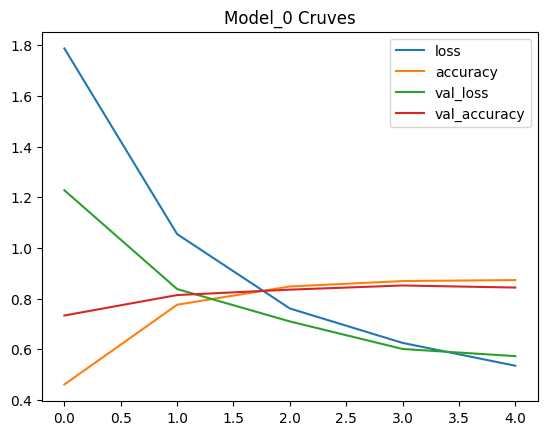

In [ ]:
import pandas as pd
h0 = pd.DataFrame(history_0.history)
h0.plot(title="Model_0 Cruves")

<Axes: title={'center': 'Model_0 Copy Cruves'}>

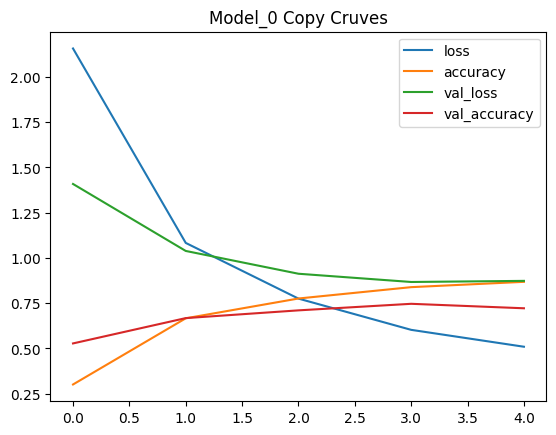

In [ ]:
h0_copy = pd.DataFrame(history_0_coy.history)
h0_copy.plot(title="Model_0 Copy Cruves")

In [ ]:
import tensorflow as tf
input_shape = (1,4,4,3)
input_tensor = tf.random.normal(input_shape)
print(tf.keras.layers.GlobalAveragePooling2D()(input_tensor))

tf.Tensor([[0.32050103 0.01901872 0.27141225]], shape=(1, 3), dtype=float32)


In [ ]:
tf.reduce_mean(input_tensor,axis=(1,2))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.32050103, 0.01901872, 0.27141225]], dtype=float32)>

In [ ]:
input_shape = (1,4,4)
input_tensor = tf.random.normal(input_shape)
print(tf.keras.layers.GlobalAveragePooling1D()(input_tensor))

tf.Tensor([[ 0.18504615 -0.62926203  0.00513767 -0.49159938]], shape=(1, 4), dtype=float32)


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2024-05-23 17:25:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.207, 173.194.194.207, 173.194.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  38.9MB/s    in 3.3s    

2024-05-23 17:25:43 (38.9 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'

In [ ]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                              batch_size=BATCH_SIZE,
                                                                              label_mode="categorical",
                                                                              image_size=IMAGE_SIZE)
test_train = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                              image_size=IMAGE_SIZE,
                                                                              batch_size=BATCH_SIZE,
                                                                              label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

dataagumentation = keras.Sequential([
    layers.Rescaling(1/225.),
    layers.RandomZoom(0.2),
    #layers.RandomFlip("Horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
],name="Data_Augmentation")

(-0.5, 479.5, 409.5, -0.5)

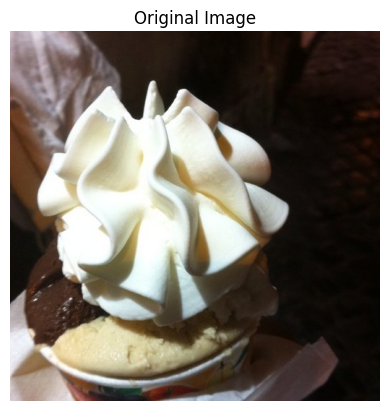

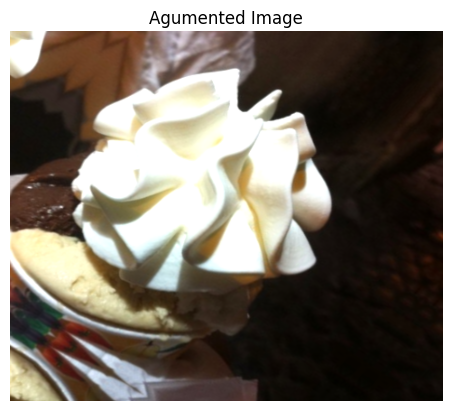

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import os
import random
target_class = random.choice(train_data.class_names)
target_dir = "10_food_classes_1_percent/train" + "/" + target_class
target_image = random.choice(os.listdir(target_dir))
img = mimage.imread(target_dir + "/" + target_image)
plt.imshow(img)
plt.title("Original Image")
plt.axis(False)
agumented_image = dataagumentation(img)
plt.figure()
plt.imshow(agumented_image)
plt.title("Agumented Image")
plt.axis(False)

In [ ]:
# Data Augumentation

data_agumentation = keras.Sequential([
    layers.RandomZoom(0.2),
    #layers.RandomFlip("Horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
],name="Data_Augmentation")

# Model Creation

input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
input_layer = layers.Input(shape=input_shape,name="Input_Layer")
x = data_agumentation(input_layer)
x = base_model(x,training=False)
x = layers.GlobalAveragePooling2D()(x)
output = layers.Dense(10,activation="softmax") (x)
model_1 = tf.keras.Model(input_layer,output)
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
mhistory_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                         validation_data=test_data,
                         validation_steps=int(0.25 * len(test_data)))

Epoch 1/5
3/3 [==============================] - 14s 3s/step - loss: 2.4351 - accuracy: 0.1714 - val_loss: 2.2719 - val_accuracy: 0.1678
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1652 - accuracy: 0.2143 - val_loss: 2.1485 - val_accuracy: 0.2303
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9415 - accuracy: 0.3571 - val_loss: 2.0302 - val_accuracy: 0.2993
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7803 - accuracy: 0.5143 - val_loss: 1.9003 - val_accuracy: 0.3931
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6037 - accuracy: 0.6714 - val_loss: 1.8076 - val_accuracy: 0.4408


In [ ]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_Augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                           

<Axes: title={'center': 'Model_1 Loss Curves'}>

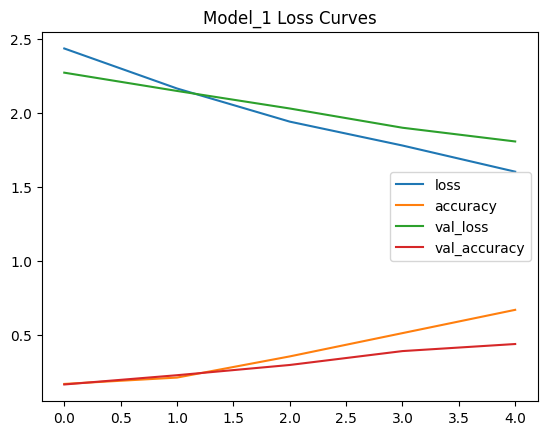

In [ ]:
h1 = pd.DataFrame(mhistory_1.history)
h1.plot(title="Model_1 Loss Curves")

In [ ]:
# Model_2 Training with the 10% of data
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
ten_percent_train_dir = "10_food_classes_10_percent/train"
ten_percent_test_dir = "10_food_classes_10_percent/test"
IMAGE_SHAPE = (224,224,3)
BATCH_SIZE = 32

ten_percent_train_data = image_dataset_from_directory(ten_percent_train_dir,
                                          image_size=IMAGE_SIZE,
                                          batch_size=BATCH_SIZE,
                                          label_mode="categorical")

ten_percent_test_data = image_dataset_from_directory(ten_percent_test_dir,
                                          image_size=IMAGE_SIZE,
                                          batch_size=BATCH_SIZE,
                                          label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Data_augmentation = keras.Sequential([
    layers.RandomZoom(0.2),
    layers.RandomFlip(),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

input_shape = (224,224,3)
base_model_2 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_2.trainable = False
input_layer = tf.keras.layers.Input(shape=input_shape)
x = Data_augmentation(input_layer)
x = base_model_2(x,training=False)
x = layers.GlobalAveragePooling2D()(x)
output_layer = layers.Dense(10,activation="softmax")(x)
model_2 = tf.keras.Model(input_layer,output_layer)

In [ ]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (5

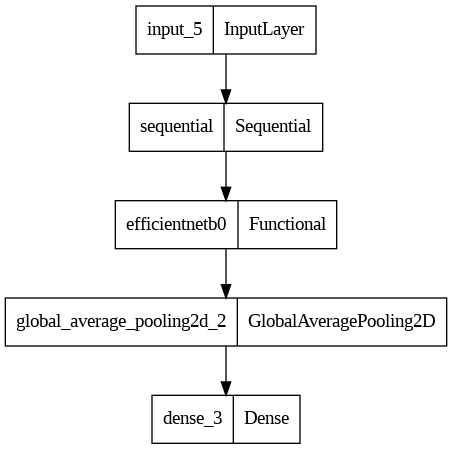

In [ ]:
tf.keras.utils.plot_model(model_2)

In [ ]:
## Model Checkpoints
checkpoint_dir = "checkpoint_dir/ten_percent_data/model_1/"
model_1_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,
                                                        save_best_only=False,
                                                        save_weights_only=False,
                                                        save_freq='epoch',verbose=1)

In [ ]:
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_history = model_1.fit(ten_percent_train_data,
            epochs=5,
            steps_per_epoch=len(ten_percent_train_data),
            validation_data=ten_percent_test_data,
            validation_steps=len(ten_percent_test_data),
            callbacks=[model_1_checkpoint])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 0.6090 - accuracy: 0.8507
Epoch 1: saving model to checkpoint_dir/ten_percent_data/model_1/
24/24 [==============================] - 65s 2s/step - loss: 0.6090 - accuracy: 0.8507 - val_loss: 0.5370 - val_accuracy: 0.8556
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.5390 - accuracy: 0.8640
Epoch 2: saving model to checkpoint_dir/ten_percent_data/model_1/
24/24 [==============================] - 48s 2s/step - loss: 0.5390 - accuracy: 0.8640 - val_loss: 0.5153 - val_accuracy: 0.8572
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.5061 - accuracy: 0.8773
Epoch 3: saving model to checkpoint_dir/ten_percent_data/model_1/
24/24 [==============================] - 46s 2s/step - loss: 0.5061 - accuracy: 0.8773 - val_loss: 0.5012 - val_accuracy: 0.8536
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.4799 - accuracy: 0.8773
Epoch 4: saving model to checkpoint_dir/ten

In [39]:
model_1.evaluate(ten_percent_test_data)

79/79 [==============================] - 10s 107ms/step - loss: 0.4727 - accuracy: 0.8604


[0.4726746678352356, 0.8604000210762024]

<Axes: title={'center': 'Model_1 Loss Curvers'}>

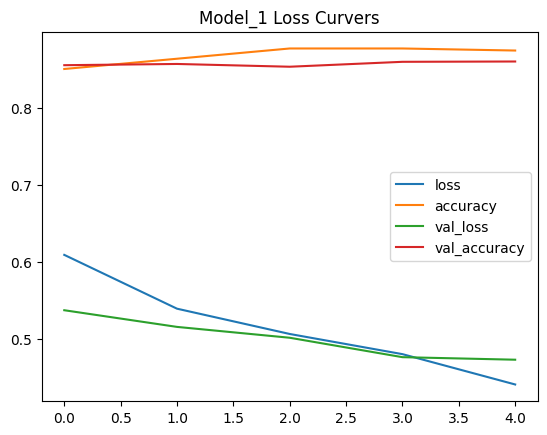

In [40]:
model_1_h = pd.DataFrame(model_history.history)
model_1_h.plot(title="Model_1 Loss Curvers")

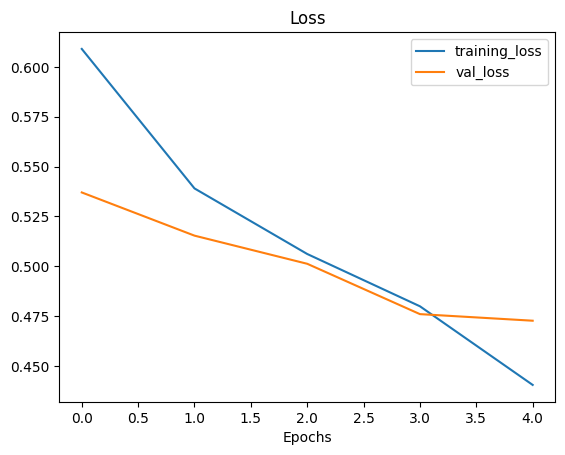

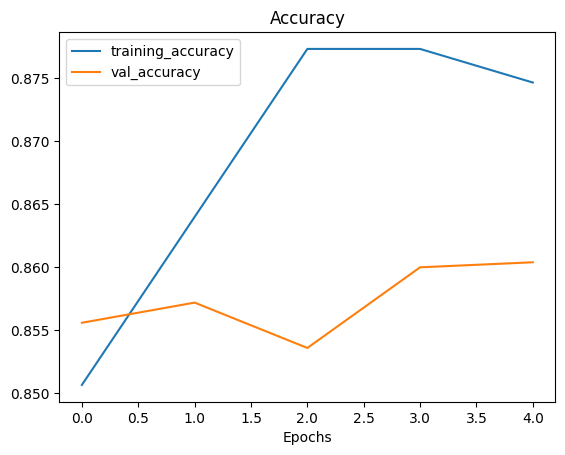

In [41]:
plot_loss_curves(model_history)